In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
from plotly.graph_objects import * 
import warnings
from sklearn.metrics import mean_absolute_error, r2_score
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   

from statsmodels.tsa.holtwinters import ExponentialSmoothing


Загрузка данных
=====

In [2]:
df = pd.read_csv('../datatest/monthly-car-sales.csv')

In [25]:
df.tail()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342


Создадим серию, у которой в качестве индекса будет Month, а в качестве значений - количество продаж Sales

<AxesSubplot:xlabel='Month'>

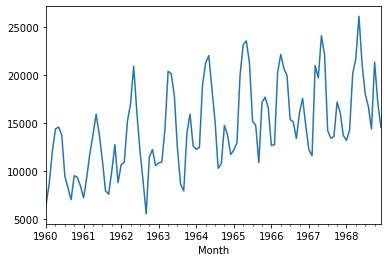

In [4]:
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
s = df['Sales']
s.index.freq = 'MS'
s.plot()

Задание №1
===

Разделить данные на train и test, оставив на test два года

In [34]:
# your code 
# train, test = 
size_train = 24
train, test = df[0:-size_train],df[-size_train:]
print('initial size = ' + str(len(df)) + ', train size = ' + str(len(train)) + ', test size = ' + str(len(test)))

initial size = 108, train size = 84, test size = 24


,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342


Задание №2
===

* Создать модель <code> SimpleExpSmoothing </code>
* Натренировать ее на train данных
* Сделать предсказания как для train, так и для test
* Выбрать метрики и посчитать качества предсказаний для train и для test
* Построить графики, на которых будут как реальные данные, так и предсказания




In [136]:
# your code 
train['ses']=SimpleExpSmoothing(train).fit(smoothing_level=0.9,optimized=False,use_brute=True).fittedvalues

mae = mean_absolute_error(train['Sales'], train['ses'])
layout = Layout(title = f'TRAIN vs ORIGINAL: MAE={mae}')

iplot(Figure(data=[Scatter(x =train.index,
                          y = train['Sales'],
                          name = 'Original'),
                  Scatter(x = train.index,
                         y = train['ses'],
                         name = 'Simple Exponential Smoothing')],
              layout= layout))



In [143]:
if ('ses' in train.columns):
    train.drop('ses', axis=1, inplace=True)
    
s_train = pd.Series(index=train.index,data=train['Sales'].values)
s_test = pd.Series(index=test.index,data=test['Sales'].values)


preds = list()
for i in range(len(test)):
    mod = SimpleExpSmoothing(s_train)
    preds.append(mod.fit(smoothing_level=0.9,optimized=False).forecast(1).values[0])
    s_train = pd.concat([s_train,s_test[i:i+1]])


mae = mean_absolute_error(test['Sales'], preds)
layout = Layout(title = f'PREDICATION vs ORIGINAL: MAE={mae}')

iplot(Figure(data=[Scatter(x =test.index,
                          y = test['Sales'],
                          name = 'Original'),
                  Scatter(x = test.index,
                         y = preds,
                         name = 'Predication Exponential Smoothing')],
              layout= layout))    


Задание №3
===
* Построить модели двойного и тройного экспоненциального сглаживания
* Так же, как и в предыдущем задании, посчитать метрики для train и test
* Построить график

In [165]:
# your code
train_copy = train.copy()
train_copy['des_add']=ExponentialSmoothing(train, trend='add').fit().fittedvalues
train_copy['des_mul']=ExponentialSmoothing(train, trend='mul').fit().fittedvalues

mae1 = mean_absolute_error(train_copy['Sales'], train_copy['des_add'])
mae2 = mean_absolute_error(train_copy['Sales'], train_copy['des_mul'])
layout = Layout(title = f'TEST Prediction vs ORIGINAL: MAE_SA={mae1}, MEA_SM={mae2}')


iplot(Figure(data=[Scatter(x =train_copy.index,
                          y = train_copy['Sales'],
                          name = 'Original'),
                  Scatter(x = train_copy.index,
                         y = train_copy['des_add'],
                         name = 'Double Exponential Smoothing (Additive)'),
                  Scatter(x = train_copy.index,
                         y = train_copy['des_mul'],
                         name = 'Double Exponential Smoothing (Multiplicative)')],
              layout= layout))  

train_copy['tes_add']=ExponentialSmoothing(train, trend='add', seasonal='add',seasonal_periods=12).fit().fittedvalues
train_copy['tes_mul']=ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

mae3 = mean_absolute_error(train_copy['Sales'], train_copy['tes_add'])
mae4 = mean_absolute_error(train_copy['Sales'], train_copy['tes_mul'])
layout = Layout(title = f'TEST Prediction vs ORIGINAL: MAE_SA={mae3}, MEA_SM={mae4}')


iplot(Figure(data=[Scatter(x =train_copy.index,
                          y = train_copy['Sales'],
                          name = 'Original'),
                  Scatter(x = train_copy.index,
                         y = train_copy['tes_add'],
                         name = 'Tripple Exponential Smoothing (Additive)'),
                  Scatter(x = train_copy.index,
                         y = train_copy['tes_mul'],
                         name = 'Tripple Exponential Smoothing (Multiplicative)')],
              layout= layout))  



C:\Users\o.sylenko\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\o.sylenko\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



C:\Users\o.sylenko\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\o.sylenko\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [161]:
mod = ExponentialSmoothing(train, trend='add', seasonal='add',seasonal_periods=12)
mod_fit = mod.fit()
predictions = mod_fit.forecast(len(test))

mae5 = mean_absolute_error(test['Sales'], predictions)
layout = Layout(title = f'SEASON ADD TRAIN vs ORIGINAL: MAE={mae5}')

iplot(Figure(data=[Scatter(x = test.index,
                          y = test['Sales'],
                          name = 'Original'),
                  Scatter(x=test.index,
                         y = predictions,
                         name = 'Predictions')],
              layout= layout))  

C:\Users\o.sylenko\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [162]:
mod = ExponentialSmoothing(train, trend='mul', seasonal='mul',seasonal_periods=12)
mod_fit = mod.fit()
predictions = mod_fit.forecast(len(test))

mae6 = mean_absolute_error(test['Sales'], predictions)
layout = Layout(title = f'SEASON MUL TRAIN vs ORIGINAL: MAE={mae6}')

iplot(Figure(data=[Scatter(x = test.index,
                          y = test['Sales'],
                          name = 'Original'),
                  Scatter(x=test.index,
                         y = predictions,
                         name = 'Predictions')],
              layout= layout))  

C:\Users\o.sylenko\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



Задание №4
* Выбрать модель с наиболее подходящими параметрами среди предыдущих 
* Сделать цикл кросс-валидации, где размер test равен одному году
* Посчитать среднее значение выбранных метрик

C:\Users\o.sylenko\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



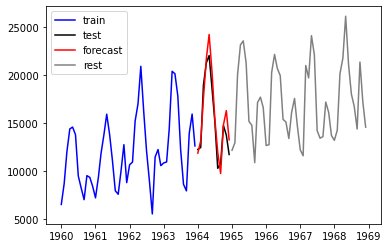

C:\Users\o.sylenko\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



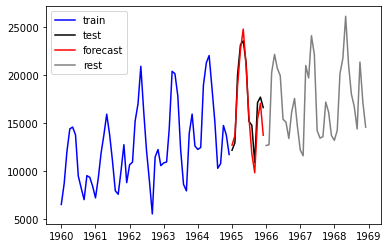

C:\Users\o.sylenko\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



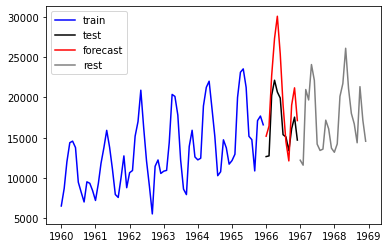

C:\Users\o.sylenko\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



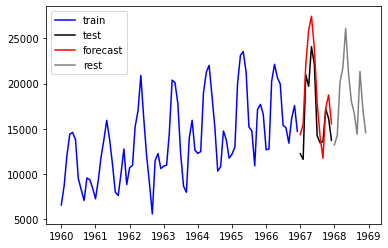

C:\Users\o.sylenko\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



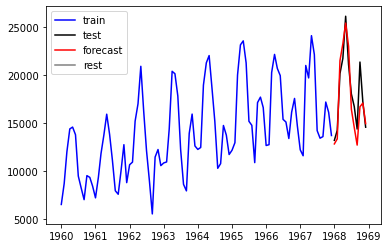

In [170]:
# your code
# лучшая модель - тройного экспоненциального сглаживания с seasonal и trend == add
import matplotlib
import matplotlib.pyplot as plt

test_size = 12
n_splits = 5 
size = len(df)

s = pd.Series(index=df.index,
             data = df['Sales'].values)

mae_list = list()
for i in reversed(range(n_splits)):
    idx = size - (i+1)*test_size
    train = s[0:idx]
    test = s[idx:idx+test_size]
    rest = s[idx+test_size:]
    mod = ExponentialSmoothing(train, trend='mul', seasonal='mul',seasonal_periods=12)

    mod_fit = mod.fit()
    predictions = mod_fit.forecast(len(test))
    
    fig, ax = plt.subplots()
    ax.plot(train, label='train', c = 'blue')
    ax.plot(test, label = 'test', c = 'black')
    ax.plot(predictions, label = 'forecast', c= 'red')
    ax.plot(rest, label = 'rest', c = 'grey')
    ax.legend()
    plt.show()
    mae_list.append(mean_absolute_error(test, predictions))

In [171]:
mae_list

[1159.570545800282,
 1191.5082593852528,
 3603.9520248348913,
 2442.4804357953212,
 1438.784347288419]